In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1.What type of restaurant do the majority of customers order from?

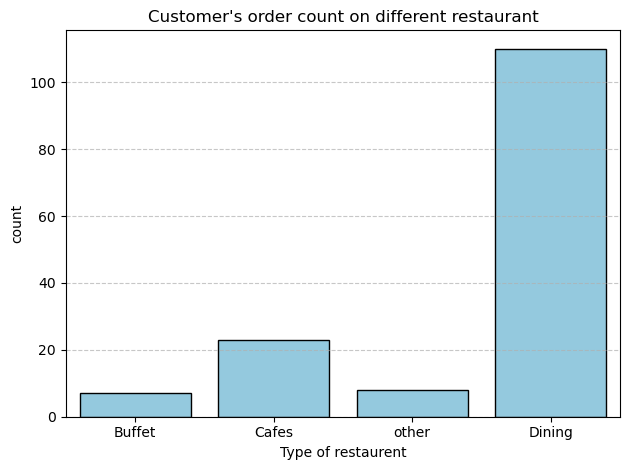

In [18]:
sns.countplot(x = df['listed_in(type)'], edgecolor='black' , color = "skyblue")
plt.title("Customer's order count on different restaurant")
plt.xlabel("Type of restaurent")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid cut-off labels
plt.show()

# 2.How many votes has each type of restaurant received from customers?

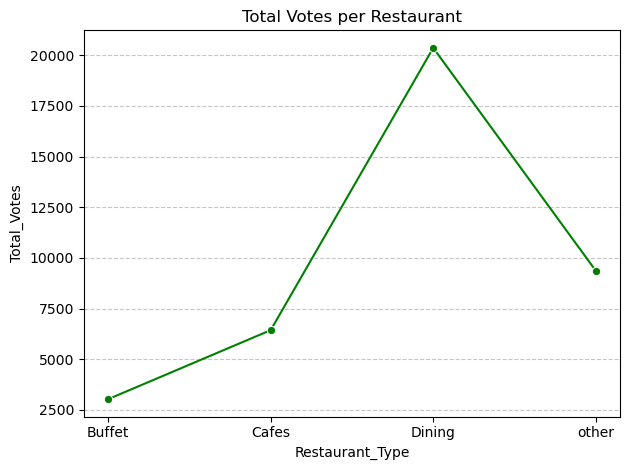

In [17]:
groupedData = df.groupby('listed_in(type)')['votes'].sum()
sns.lineplot(data = groupedData , color = "green" , marker = "o"  )
plt.title("Total Votes per Restaurant")
plt.xlabel("Restaurant_Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid cut-off labels
plt.ylabel("Total_Votes")
plt.show()

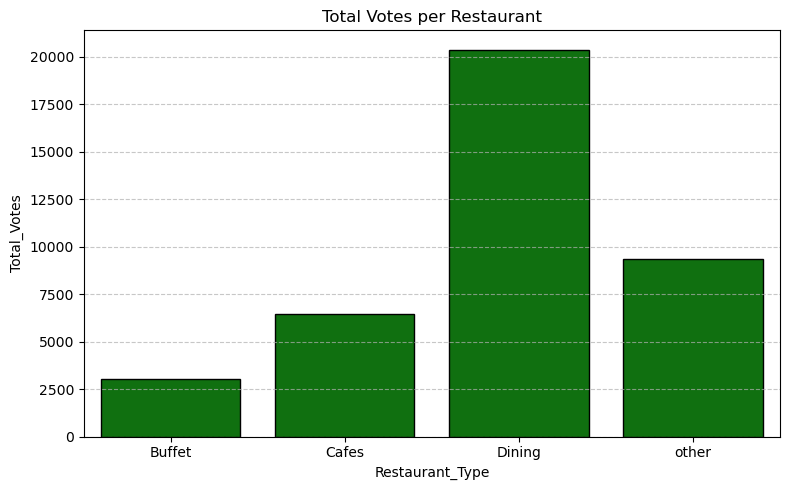

In [13]:
groupedData = df.groupby('listed_in(type)')['votes'].sum().reset_index()
groupedData.columns = ['Restaurant_Type', 'Total_Votes']
plt.figure(figsize=(8, 5))  # Set a good figure size
sns.barplot(data = groupedData , x = groupedData['Restaurant_Type'] , y = groupedData['Total_Votes'] , color = 'green',edgecolor='black')
plt.title("Total Votes per Restaurant")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid cut-off labels
plt.show()

# 3.What are the ratings that the majority of restaurants have received?

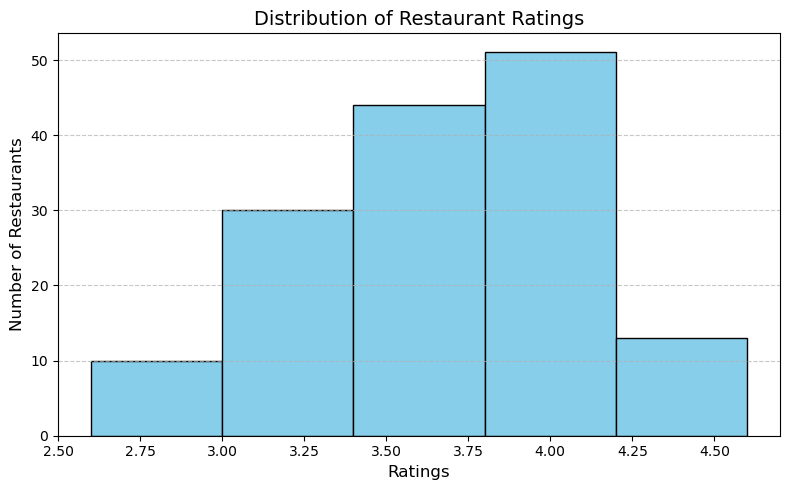

In [10]:
plt.figure(figsize=(8, 5))  # Set a good figure size
plt.hist(x=df['rate'], bins=5, color='skyblue', edgecolor='black')

plt.title('Distribution of Restaurant Ratings', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid cut-off labels
plt.show()

# 4.Zomato has observed that most couples order most of their food online. What is their average spending on each order?

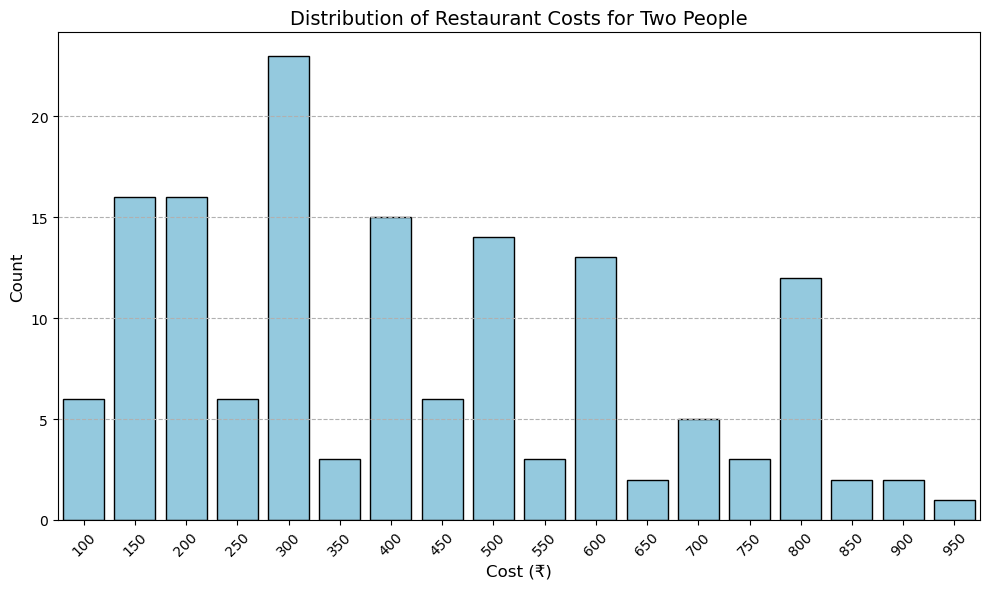

Conclution :- The majority of couples order their food with the cost of 300. 


In [32]:
plt.figure(figsize=(10, 6))
# Plot
sns.barplot(x=gp.index, y=gp.values, color='skyblue', edgecolor = 'black')
plt.title('Distribution of Restaurant Costs for Two People', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cost (₹)', fontsize=12)
plt.xticks(rotation=45)  # Optional: rotate x labels if overlapping
plt.tight_layout()
plt.grid(axis = 'y' , linestyle = '--')
plt.show()
print("Conclution :- The majority of couples order their food with the cost of 300. ")

# 5.Which mode (online or offline) has received the maximum rating?

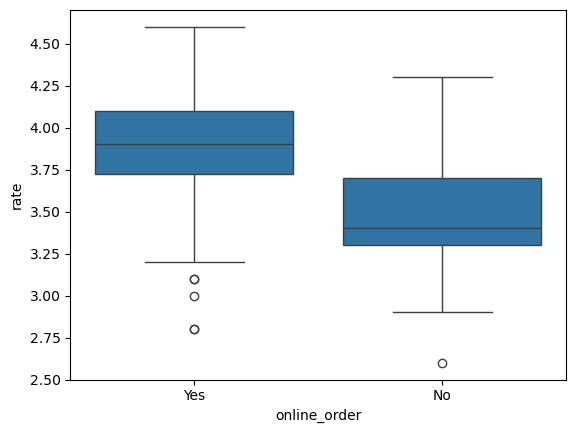

Online order receives higher rating


In [62]:
sns.boxplot(data=df, x='online_order', y='rate')
plt.show()
print("Online order receives higher rating")

# 6.Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

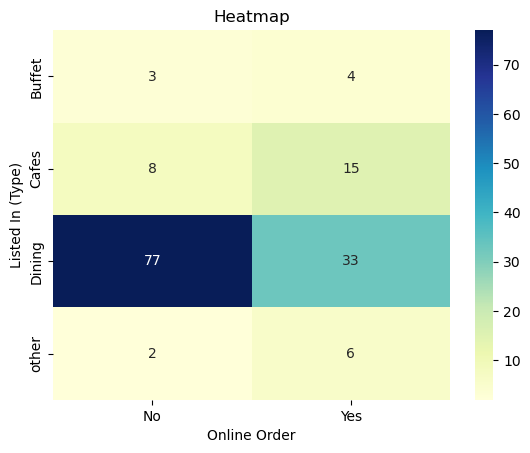

In [64]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


# 7 What is the average rating of different types restaurent.

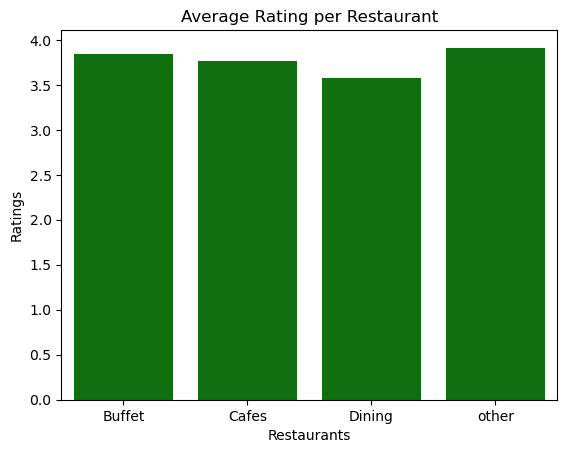

In [65]:
gp = df.groupby('listed_in(type)')['rate'].mean().reset_index()
gp.columns=['Restaurants','Ratings']
sns.barplot(data = gp , x=gp['Restaurants'] , y = gp['Ratings'],color = "green")
plt.title("Average Rating per Restaurant")
plt.show()